
# Задачі кластеризації та класифікації


<h2>Мета</h2>

Ознайомитись з різновидами моделей для задач кластеризації та класифікації, а також методами побудови та оцінки цих моделей. Після завершення цієї лабораторної роботи ви зможете:

* Використовувати прості моделі для задач кластеризації та класифікації
* Використовувати перехресну перевірку для оцінки якості моделі
* Обирати оптимальну складність моделі для уникнення перенавчання
* Вдосконалювати моделі за допомогою підбору параметрів

Приблизний час виконання: **60** хвилин

# <h2>Зміст</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<h3>Завдання для тренування</h3>
<ul>
    <li><a href="#ref1">Задача кластеризації </a></li>
    <li><a href="#ref2">Підбір параметрів моделі </a></li>
    <li><a href="#ref3">Задача класифікації </a></li>
    <li><a href="#ref4">Підбір параметрів моделі </a></li>
</ul>

</div>

<hr>

Імпорт бібліотек та даних:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import mean_squared_error, r2_score, classification_report, silhouette_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [2]:
# Якщо забули зберегти дані, то скористайтесь цим файлом (This dataset was hosted on IBM Cloud object)

path = '../data/auto2.csv'

In [3]:
df = pd.read_csv(path)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0.2       201 non-null    int64  
 1   Unnamed: 0         201 non-null    int64  
 2   Unnamed: 0.1       201 non-null    int64  
 3   symboling          201 non-null    int64  
 4   normalized-losses  201 non-null    int64  
 5   make               201 non-null    object 
 6   aspiration         201 non-null    object 
 7   num-of-doors       201 non-null    object 
 8   body-style         201 non-null    object 
 9   drive-wheels       201 non-null    object 
 10  engine-location    201 non-null    object 
 11  wheel-base         201 non-null    float64
 12  length             201 non-null    float64
 13  width              201 non-null    float64
 14  height             201 non-null    float64
 15  curb-weight        201 non-null    int64  
 16  engine-type        201 non

<a name="ref1"></a>
## <h2>Задача кластеризації</h2>

<p>Кластеризація використовується у випадках, коли потрібно розділити сукупність об'єктів на групи, але міток груп ми не маємо і кількість груп теж не відома.</p>

<h3>Метод k-середніх</h3>
    
<p>Одним з найпоширеніших та найпростіших методів кластеризації є метод k-середніх, де k - кількість кластерів, на яку будемо групувати дані.</p>
<p>Виділимо ознаки, по яким будемо кластеризувати дані:</p>


In [4]:
features = df[['price', 'city-mpg']]
features

,price,city-mpg
0,13495.0,21
1,16500.0,21
2,16500.0,19
3,13950.0,24
4,17450.0,18
...,...,...
196,16845.0,23
197,19045.0,19
198,21485.0,18
199,22470.0,26


<p>Ініціалізуємо алгоритм k середніх (кількість кластерів - 2 - задана навмання):</p>


In [5]:
kmeans1 = KMeans(
    init='random',
    n_clusters=2,
    n_init=10,
    max_iter=300
)

kmeans1.fit(features)

KMeans(init='random', n_clusters=2, n_init=10)

<p>Отримані центри кластерів:</p>


In [6]:
kmeans1.cluster_centers_

array([[1.07386648e+04, 2.61988636e+01],
       [3.05851200e+04, 1.80000000e+01]])

<p>Масив із номерами кластерів для кожного рядка даних:</p>


In [7]:
kmeans1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1])

<p>Візуалізуємо отримані кластери:</p>


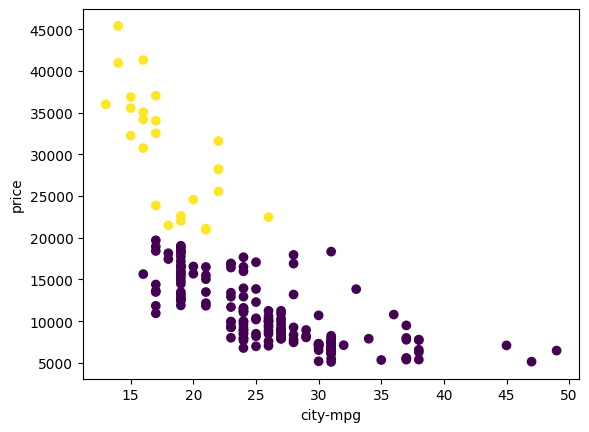

In [8]:
plt.xlabel('city-mpg')
plt.ylabel('price')
plt.scatter(df[['city-mpg']], df[['price']], c=kmeans1.labels_)
plt.show()

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<h2> Завдання  #1:</h2>

<p>Виконайте кластеризацію по тим же ознакам, задавши більшу кількість кластерів (3-5).</p>
</div>


In [9]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
kmeans2 = KMeans(
    init='random',
    n_clusters=4,
    n_init=10,
    max_iter=300
)

kmeans2.fit(features)
kmeans2.cluster_centers_

array([[1.19766122e+04, 2.31836735e+01],
       [1.82912000e+04, 2.05555556e+01],
       [7.52430769e+03, 3.00329670e+01],
       [3.49976875e+04, 1.66875000e+01]])

<details><summary>Натисніть тут, щоб побачити підказку</summary>

```python
kmeans2 = KMeans(
    init='random',
    n_clusters=3,
    n_init=10,
    max_iter=300
)

kmeans2.fit(features)
kmeans2.cluster_centers_
```

</details>

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<h2> Завдання  #2:</h2>

<p>Візуалізуйте отримані кластери.</p>
</div>


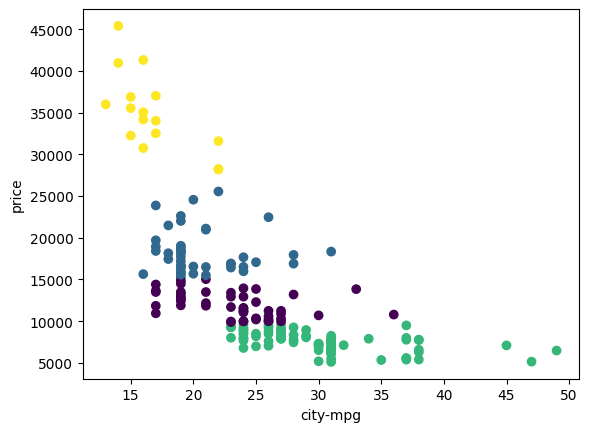

In [10]:
plt.xlabel('city-mpg')
plt.ylabel('price')
plt.scatter(df[['city-mpg']], df[['price']], c=kmeans2.labels_)
plt.show()

<details><summary>Натисніть тут, щоб побачити підказку</summary>

```python
plt.xlabel('city-mpg')
plt.ylabel('price')
plt.scatter(df[['city-mpg']], df[['price']], c=kmeans2.labels_)
plt.show()
```

</details>


<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<h2> Завдання  #3:</h2>

<p>Виконайте кластеризацію по ознакам 'price', 'horsepower', 'city-mpg', кількість кластерів 3.</p>
</div>


In [11]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
kmeans2 = KMeans(
    init='random',
    n_clusters=3,
    n_init=10,
    max_iter=300
)

kmeans2.fit(df[['price','horsepower', 'city-mpg']])
kmeans2.cluster_centers_

array([[3.49976875e+04, 1.76750000e+02, 1.66875000e+01],
       [1.69716984e+04, 1.25936508e+02, 2.08253968e+01],
       [8.40535246e+03, 8.21517403e+01, 2.85409836e+01]])

<details><summary>Натисніть тут, щоб побачити підказку</summary>

```python
kmeans3 = KMeans(
    init='random',
    n_clusters=3,
    n_init=10,
    max_iter=300
)

kmeans3.fit(df[['price', 'horsepower', 'city-mpg']])
kmeans3.cluster_centers_
```

</details>


<h3>Ієрархічна кластеризація</h3>
    
<p>Ієрархічна кластеризація починає роботу з того, що кожному екземпляру даних зіставляється власний кластер. Потім два найближчих кластери об'єднуються в один і так далі, доки не буде утворено один загальний кластер.

Результат ієрархічної кластеризації може бути представлений за допомогою дендрограми.</p>
<p>Виділимо ознаки, по яким будемо кластеризувати дані:</p>


In [12]:
cars_df = df[['price', 'make', 'horsepower', 'city-mpg']]

Виключаємо інформацію про виробника ('make'), зберігаємо для подальшого використання в якості міток листків


In [13]:
varieties = list(cars_df.pop('make'))

Отримуємо дані з датафрейму як масив NumPy


In [14]:
samples = cars_df.values

Реалізуємо ієрархічну кластеризацію за допомогою функції <code>linkage()</code>

In [15]:
mergings = linkage(samples, method='complete')

Будуємо дендрограму, вказавши зручні для відображення параметри


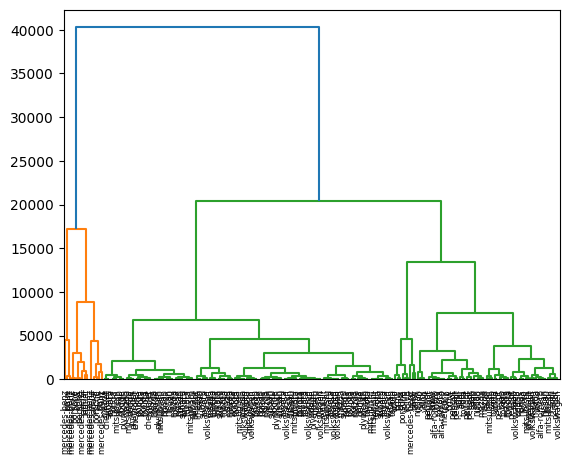

In [16]:
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
           )

plt.show()

Можна бачити, що в результаті ієрархічної кластеризації даних природно сталося розбиття на два кластери, позначених на рисунку різним кольором. При цьому вихідне число кластерів не задавали.


<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<h2> Завдання  #4:</h2>

<p>Виконайте ієрархічну кластеризацію по ознакам 'horsepower', 'city-mpg', 'highway-mpg'.</p>
</div>


In [17]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
cars_df  = df[['make', 'horsepower','city-mgp','highwat-mpg']]
varieties = list(cars_df.pop('make'))
samples = cars_df.values
mergings = linkage(samples, method='complete')
dendrogram(mergings, labels=varieties,
           )

SyntaxError: expected argument value expression (1765782078.py, line 6)

<details><summary>Натисніть тут, щоб побачити підказку</summary>

```python
cars_df = df[['make', 'horsepower', 'city-mpg', 'highway-mpg']]
varieties = list(cars_df.pop('make'))
samples = cars_df.values
mergings = linkage(samples, method='complete')
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
           )

plt.show()
```

</details>


<h3>Порівняння методу k-середніх з ієрархічною кластеризацією</h3>
<ul>    
<li>Ієрархічна кластеризація гірше підходить для кластеризації великих обсягів даних у порівнянні з методом k-середніх. Це пов'язано з тим, що часова складність алгоритму лінійна для методу k-середніх (O(n)) і квадратична для методу ієрархічної кластеризації (O(n^2))</li>
<li>У кластеризації за допомогою методу k-середніх алгоритм починає побудову з довільного вибору початкових точок, тому результати, що генеруються при багаторазовому запуску алгоритму, можуть відрізнятися. У той самий час у разі ієрархічної кластеризації результати відтворюються.</li>
<li>З центроїдної геометрії побудови методу k-середніх випливає, що метод добре працює, коли форма кластерів є гіперсферичною (наприклад, коло у 2D або сфера у 3D).</li>
<li>Метод k-середніх чутливіший до зашумлених даних, ніж ієрархічний метод.</li>
</ul>



<a name="ref2"></a>
## <h2>Задача кластеризації. Підбір параметрів моделі</h2>

<p>Визначимо кількість кластерів для методу k-середніх, доречну для наших даних. Скористаємось методом "ліктя" (elbow method). Для цього ініціалізуємо алгоритм k середніх кількістю кластерів від 1 до 10 і для кожної моделі обрахуємо суму квадратів похибок (евклідових відстаней точок кластерів від відповідних центрів):</p>

In [ ]:
kmeans_kwargs = {
    'init': 'random',
    'n_init': 10,
    'max_iter': 300,
    'random_state': 42,
}

sse = []
max_kernels = 10
for k in range(1, max_kernels + 1):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(features)
    sse.append(kmeans.inertia_)

 Отримані сумарні похибки візуалізуємо на графіку:


In [ ]:
plt.plot(range(1, max_kernels + 1), sse)
plt.xticks(range(1, max_kernels + 1))
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.grid(linestyle='--')
plt.show()

З графіку бачимо, що "лікоть" для значення кількості кластерів 3 або 4.

Додатково розрахуємо коефіцієнти силуетів (silhouette coefficients) для визначення кращої кількості кластерів:


In [ ]:
silhouette_coefficients = []

for k in range(2, max_kernels + 1):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(features)
    score = silhouette_score(features, kmeans.labels_)
    silhouette_coefficients.append(score)

Візуалізуємо значення коефіцієнтів для різної кількості центрів:


In [ ]:
plt.plot(range(2, max_kernels + 1), silhouette_coefficients)
plt.xticks(range(2, max_kernels + 1))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(linestyle='--')
plt.show()

Виходячи з результатів застосування методу "ліктя" та обрахування коефіцієнтів силуетів, оберемо  кількість кластерів рівною 4:


In [ ]:
kmeans = KMeans(
    init='random',
    n_clusters=4,
    n_init=10,
    max_iter=300,
    random_state=42
)

kmeans.fit(features)

<a name="ref3"></a>
## <h2>Задача класифікації</h2>

<p>Класифікація використовується у випадках, коли потрібно віднеси кожен об'єкт до однієї з груп, при цьому для навчання моделі ми маємо набір даних з проставленими мітками груп і кількість груп відома.</p>

<p>Виділимо потрібні ознаки: 'price', 'make', 'body-style', 'horsepower', 'city-mpg'.</p>
<p>Класифікувати дані будемо по типу кузова ('body-style').</p>

 Кодуємо категоріальні значення для всіх якісних ознак крім тої, по якій проводимо класифікацію:


In [ ]:
all_features=pd.get_dummies(df[['price', 'make', 'horsepower', 'city-mpg']])


In [ ]:
all_features[['body-style']] = df[['body-style']]
all_features

 Розділимо увесь датасет на навчальну і тестову вибірки за допомогою функції <code>train_test_split()</code>:


In [ ]:
df_train, df_test = train_test_split(
    all_features,
    test_size=0.2,
    random_state=1
)
df_train.head()

In [ ]:
df_train.shape, df_test.shape

<p>Розмістимо цільові дані - тип кузова ('body-style') -  в окремому датафреймі:</p>

In [ ]:
x_train = df_train.drop(columns='body-style')
y_train = df_train['body-style']

x_test = df_test.drop(columns='body-style')
y_test = df_test['body-style']

<h3>Навчання та тестування моделей:</h3>

Для навчання були обрані наступні методи:

- k-nearest neighbors;
- Support vector machines;
- Decision Tree;
- Random Forest;
- Extra Trees;
- AdaBoost;
- Gradient Boosting.

In [ ]:
#from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix
#from sklearn.model_selection import cross_val_score, KFold
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC
#from sklearn import tree
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import ExtraTreesClassifier
#from sklearn.ensemble import AdaBoostClassifier
#from sklearn.ensemble import GradientBoostingClassifier

 <h3>k-nearest neighbors</h3>


У KNN-моделі потрібно вказати параметр n_neighbors - число точок, яке дивитися класифікатор, щоб визначити, якого класу належить нова точка.


In [ ]:
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(x_train, y_train)

Оцінка точності – найпростіший варіант оцінки роботи класифікатора

In [ ]:
print('mean accuracy = ', KNN_model.score(x_test, y_test))

Але матриця невідповідностей та звіт про класифікацію дадуть більше інформації


In [ ]:
print(classification_report(y_test, KNN_model.predict(x_test)))

print(confusion_matrix(y_test, KNN_model.predict(x_test)))

Відобразимо матрицю невідповідностей на візуалізації


In [ ]:
def show_confusion_matrix(matrix, title):
    ax = sns.heatmap(matrix, annot=True, cmap='Greens')
    ax.set_title(title)
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    #ax.xaxis.set_ticklabels(['Negative', 'Positive'])  # тільки для 2 класів
    #ax.yaxis.set_ticklabels(['False', 'True'])         # тільки для 2 класів

    plt.show()

In [ ]:
show_confusion_matrix(confusion_matrix(y_test, KNN_model.predict(x_test)), 'KNeighborsClassifier confusion matrix')

 <h3>Support vector machines</h3>


In [ ]:
SVC_model = SVC()
SVC_model.fit(x_train, y_train)

Оцінка моделі

In [ ]:
print('mean accuracy = ', SVC_model.score(x_test, y_test))

Матриця невідповідностей та звіт про класифікацію


In [ ]:
print(classification_report(y_test, SVC_model.predict(x_test)))

print(confusion_matrix(y_test, SVC_model.predict(x_test)))

 <h3>Decision Tree Classifier</h3>


 Валідація моделей виконуватиметься за допомогою крос-валідації.


In [ ]:
decision_tree = DecisionTreeClassifier(max_depth=3, random_state=1)
tree_scores = cross_val_score(decision_tree, x_train, y_train, cv=5)
tree_scores

In [ ]:
tree_scores.mean()

 Навчаємо модель на всьому доступному навчальному наборі


In [ ]:
decision_tree.fit(x_train, y_train)

 Оцінка моделі на тестових даних:


In [ ]:
decision_tree.score(x_test, y_test)

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<h2> Завдання  #5:</h2>

<p>Побудуйте Decision Tree Classifier тільки по кількісним ознакам 'price', 'horsepower', 'city-mpg' (для цього відберіть потрібні дані у "x_train1" та "x_test1").</p>
</div>


In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання


<details><summary>Натисніть тут, щоб побачити підказку</summary>

```python
x_train1 = df_train[['price', 'horsepower', 'city-mpg']]
x_test1 = df_test[['price', 'horsepower', 'city-mpg']]

decision_tree1 = DecisionTreeClassifier(max_depth=3, random_state=1)
decision_tree1.fit(x_train1, y_train)

decision_tree1.score(x_test1, y_test)
```

</details>


Візуалізуємо дерево:


In [ ]:
plt.figure(figsize=(25,20))
_ = tree.plot_tree(decision_tree1,
                   feature_names=x_train1.columns,
                   class_names=y_train,
                   filled=True)

 <h3>Random Forest Classifier</h3>


In [ ]:
randomforest = RandomForestClassifier(max_depth=5)
random_scores = cross_val_score(randomforest, x_train, y_train, cv=5)
random_scores

In [ ]:
random_scores.mean()

 Навчаємо модель на всьому доступному навчальному наборі


In [ ]:
randomforest.fit(x_train, y_train)

 Оцінка моделі на тестових даних:


In [ ]:
randomforest.score(x_test, y_test)

 <h3>Extra Trees Classifier</h3>


In [ ]:
extratrees = ExtraTreesClassifier(max_depth=5)
extra_scores = cross_val_score(extratrees, x_train, y_train, cv=5)
extra_scores

In [ ]:
extra_scores.mean()

 Навчаємо модель на всьому доступному навчальному наборі


In [ ]:
extratrees.fit(x_train, y_train)

 Оцінка моделі на тестових даних:


In [ ]:
extratrees.score(x_test, y_test)

 <h3>AdaBoost Classifier</h3>


In [ ]:
adaboost = AdaBoostClassifier(learning_rate=0.3)
adaboost_scores = cross_val_score(adaboost, x_train, y_train, cv=5)
adaboost_scores

In [ ]:
adaboost_scores.mean()

 Навчаємо модель на всьому доступному навчальному наборі


In [ ]:
adaboost.fit(x_train, y_train)

 Оцінка моделі на тестових даних:


In [ ]:
adaboost.score(x_test, y_test)

 <h3>Gradient Boosting Classifier</h3>


In [ ]:
gradboost = GradientBoostingClassifier(learning_rate=0.05)
gradboost_scores = cross_val_score(gradboost, x_train, y_train, cv=5)
gradboost_scores

In [ ]:
gradboost_scores.mean()

 Навчаємо модель на всьому доступному навчальному наборі


In [ ]:
gradboost.fit(x_train, y_train)

 Оцінка моделі на тестових даних:


In [ ]:
gradboost.score(x_test, y_test)

<h3>Висновок:</h3>

Найкраще на тестових даних себе показала модель Random Forest Classifier. Проте ефективність моделей можна покращити, ретельніше підготувавши дані та підібравши кращі гіперпараметри моделей.


<a name="ref4"></a>
## <h2>Задача класифікації. Підбір параметрів моделі</h2>

<p>Скористаємось методом "ліктя" для визначення оптимальної кількості сусідів методу k-nearest neighbors. Для цього ініціалізуємо алгоритм з параметром n_neighbors від 1 до 100 і для кожної моделі обрахуємо mean accuracy:</p>

In [ ]:
accur = []
max_kernels = 100
for k in range(1, max_kernels + 1):
    KNN_model = KNeighborsClassifier(n_neighbors=k)
    KNN_model.fit(x_train, y_train)
    accur.append(KNN_model.score(x_test, y_test))

 Отримані mean accuracy візуалізуємо на графіку:


In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(range(1, max_kernels + 1), accur)
plt.xticks(range(0, max_kernels + 1,10))
plt.xlabel('n_neighbors')
plt.ylabel('mean accuracy')
plt.grid(linestyle='--')
plt.show()

З графіку бачимо, що найкраще значення n_neighbors знаходиться в межах від 10 до 25.


<p>Виконаємо підбір максимальної висоти дерева методу Decision Tree Classifier. Для цього ініціалізуємо алгоритм з параметром max_depth від 1 до 30 (для більших значень у нас недостатньо даних, отримаємо перенавчання) і для кожної моделі обрахуємо mean accuracy:</p>

In [ ]:
accur = []
max_kernels = 30
for k in range(1, max_kernels + 1):
    decision_tree = DecisionTreeClassifier(max_depth=k, random_state=1)
    decision_tree.fit(x_train, y_train)
    accur.append(decision_tree.score(x_test, y_test))

 Отримані mean accuracy візуалізуємо на графіку:


In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(range(1, max_kernels + 1), accur)
plt.xticks(range(0, max_kernels + 1,5))
plt.xlabel('max_depth')
plt.ylabel('mean accuracy')
plt.grid(linestyle='--')
plt.show()

З графіку бачимо, що зі збільшенням висоти дерева точність спочатку різко падає, а потім трохи зростає і стабілізується. 1 і 2 для одиночного дерева брати не варто. Для значень від 3 до 7 точність класифікації однакова 0.42, тому орієнтуючись на вартість можна обрати max_depth = 3. Стабілізація точності близько 0.5 спостерігається починаючи з max_depth = 17, візьмемо саме це значення, бо більша висота вже не покращить результат. Або можна додатково подивитись на інші показники точності класифікації.


<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<h2> Завдання  #6:</h2>

<p>Виконайте підбір максимальної висоти дерев для методу Random Forest.</p>
</div>


In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання


<details><summary>Натисніть тут, щоб побачити підказку</summary>

```python
accur = []
max_kernels = 30
for k in range(1, max_kernels + 1):
    randomforest = RandomForestClassifier(max_depth=k, random_state=1)
    randomforest.fit(x_train, y_train)
    accur.append(randomforest.score(x_test, y_test))

plt.figure(figsize=(10, 8))
plt.plot(range(1, max_kernels + 1), accur)
plt.xticks(range(0, max_kernels + 1,5))
plt.xlabel('max_depth')
plt.ylabel('mean accuracy')
plt.grid(linestyle='--')
plt.show()
```

</details>


<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<h2> Завдання  #7:</h2>

<p>Виконайте підбір кількості дерев для методу Random Forest (параметр n_estimators, міняйте в межах 1-50).</p>
</div>


In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання


<details><summary>Натисніть тут, щоб побачити підказку</summary>

```python
accur = []
max_kernels = 50
for k in range(10, max_kernels + 10):
    randomforest = RandomForestClassifier(n_estimators=k, random_state=1)
    randomforest.fit(x_train, y_train)
    accur.append(randomforest.score(x_test, y_test))

plt.figure(figsize=(10, 8))
plt.plot(range(1, max_kernels + 1), accur)
plt.xticks(range(0, max_kernels + 1,10))
plt.xlabel('n_estimators')
plt.ylabel('mean accuracy')
plt.grid(linestyle='--')
plt.show()
```

</details>
